In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score, precision_recall_curve

In [2]:
# Read data
data = pd.read_csv('Weekly.csv', header = 0)

In [6]:
# Data['Direction_num'] = pd.to_numeric(data['Direction_num'])
data['Direction_num'] = data['Direction'] == 'Up'

In [12]:
print(data.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction  \
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down   
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down   
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up   
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up   
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up   

   Direction_num  
0          False  
1          False  
2           True  
3           True  
4           True  


In [20]:
# Logit regression with full dataset
X_train = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
Y_train = data['Direction_num']
model_1 = Logit(Y_train, X_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.686896
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction_num   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:               9.505e-05
Time:                        11:57:39   Log-Likelihood:                -748.03
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9996
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0327      0.026     -1.250      0.211      -0.084       0.019
Lag2           0.0682      0.

Precision =  0.577807848443843
Recall =  0.7057851239669422
F1-score =  0.6354166666666666
Accuracy = 0.5500459136822773


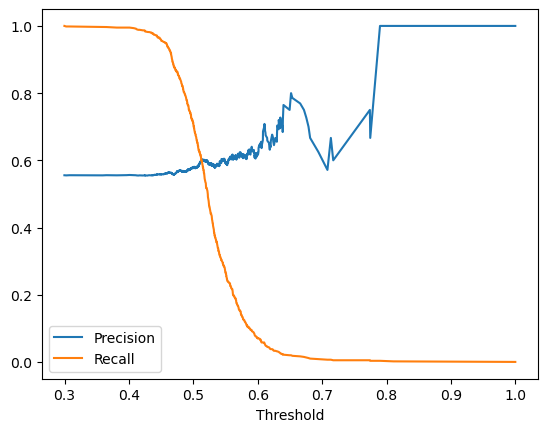

In [21]:
# Create labels (Y_train) for metrics calculation
Y_pred_raw = model_1.predict(X_train)
Y_pred_label = Y_pred_raw >= 0.5

# Calculate metrics (Y_train)
confusion_matrix(Y_train, Y_pred_label)
print('Precision = ', precision_score(Y_train, Y_pred_label))
print('Recall = ', recall_score(Y_train, Y_pred_label))
print('F1-score = ', f1_score(Y_train, Y_pred_label))
print('Accuracy =', accuracy_score(Y_train, Y_pred_label))

# Plot precision and recall against the threshold
prec, rec, thresholds = precision_recall_curve(Y_train, Y_pred_raw)
plt.plot(np.append(thresholds, 1), prec, label = 'Precision')
plt.plot(np.append(thresholds, 1), rec, label = 'Recall')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [25]:
# Logit reg with 1990-2008 data and Lag2 only
data_08 = data[(data['Year'] >= 1990) & (data['Year'] <= 2008)]
Y_train_08 = data_08['Direction_num']
X_train_08 = data_08['Lag2']
model_2 = Logit(Y_train_08, X_train_08).fit()
print(model_02.summary())

Optimization terminated successfully.
         Current function value: 0.690654
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction_num   No. Observations:                  985
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            0
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:               -0.004340
Time:                        12:17:02   Log-Likelihood:                -680.29
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0629      0.029      2.192      0.028       0.007       0.119


In [24]:
# Remaining data
data_test = data[(data['Year'] > 2008)]
X_test = data_test['Lag2']
Y_test = data_test['Direction_num']

In [28]:
# Create labels (Y_test) for metrics calculation
Y_test_pred_raw = model_2.predict(X_test)
Y_test_pred_label = Y_test_pred_raw >= 0.5

# Calculate metrics (Y_test)
confusion_matrix(Y_test, Y_test_pred_label)
print('Precision = ', precision_score(Y_test, Y_test_pred_label))
print('Recall = ', recall_score(Y_test, Y_test_pred_label))
print('F1-score = ', f1_score(Y_test, Y_test_pred_label))
print('Accuracy = ', accuracy_score(Y_test, Y_test_pred_label))

Precision =  0.6166666666666667
Recall =  0.6065573770491803
F1-score =  0.6115702479338844
Accuracy =  0.5480769230769231
